# t-SNE Example


This notebook runs t-SNE dimensionality reduction on MNIST digit image data to visualize in 2-D. It then compares the efficacy of t-SNE to other methods, such as PCA, spectral embeddings, and locally linear embeddings.

### t-SNE

t-SNE is a variant on the Stochastic Neighbor Embeddings (SNE) algorithm and was developed by Geoffrey Hinton and Laurens van der Maaten. SNE, developed by Hinton and Roweis, uses a Gaussian distribution for each point to measure the probability that every other point 'is a neighbor' and uses these distributions as the target for optimization. It is a nonlinear dimensionality reduction algorithm that focuses on minimizing the KL-divergence between the original probability distribution in high dimension and the induced lower-dimensional probability distribution. By modeling the problem to minimize the difference between the distributions, the algorithm is able to reduce dimensionality while still maintaining local structure between points, unlike other approaches (i.e. PCA). t-SNE differs from SNE, because it replaces the Gaussian similarity/neighboring probability distrubtion with a t-distribution.

t-SNE is a useful tool for data visualization and is the de facto dimensionality reduction algorithm of today.

-------

For requirements, run: `pip3 install -r requirements.txt`

Resources:

- The original [SNE paper](https://pdfs.semanticscholar.org/5d99/e7bcce87a66ae89d261f6de8e70194a8708d.pdf?_ga=2.182709157.284799646.1520790301-1740259957.1520790301) by Hinton and Roweis
- The following [t-SNE data visualization paper](https://pdfs.semanticscholar.org/1c46/943103bd7b7a2c7be86859995a4144d1938b.pdf?_ga=2.179029927.284799646.1520790301-1740259957.1520790301) by van der Maaten and Hinton
- [An Analysis of the t-SNE Algorithm for Data Visualization](https://arxiv.org/pdf/1803.01768.pdf) by Arora, Hu, & Kothari
- [t-SNE tutorial](https://github.com/oreillymedia/t-SNE-tutorial)

-------


In [1]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm

# Import sklearn dependencies
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits


# Random state.
RS = 20150101

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# Import seaborn for nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


In [2]:
# Load digit dataset from sklearn
digits = load_digits()
digits.data.shape

(1797, 64)

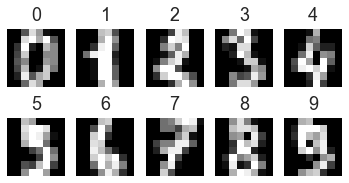

In [4]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])
plt.savefig('img/digits-generated.png', dpi=150)

In [5]:
# First reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

In [6]:
# Reduce dimensionality with t-SNE
digits_proj = TSNE(random_state=RS).fit_transform(X)

In [7]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

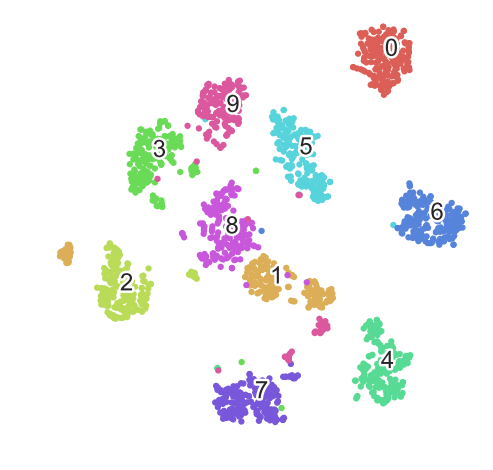

In [9]:
scatter(digits_proj, y)
plt.savefig('img/digits_tsne-generated.png', dpi=120)

### Compare against other embedding techniques

Explore the following alternative methods from sklearn:
- Locally linear
- Spectral embedding
- PCA


In [19]:
from sklearn.manifold import LocallyLinearEmbedding

# Reduce dimensionality with Locally Linear Embedding
digits_proj_lle = LocallyLinearEmbedding(n_components=2, random_state=RS).fit_transform(X)

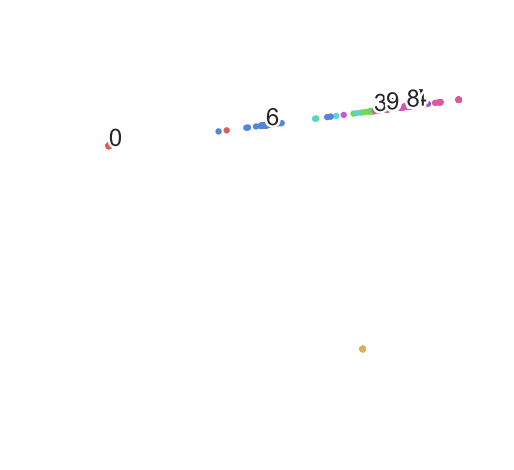

In [20]:
scatter(digits_proj_lle, y)
plt.savefig('img/digits_lle-generated.png', dpi=120)

In [13]:
from sklearn.manifold import SpectralEmbedding

# Reduce dimensionality with spectral embedding
digits_proj_se = SpectralEmbedding(random_state=RS).fit_transform(X)

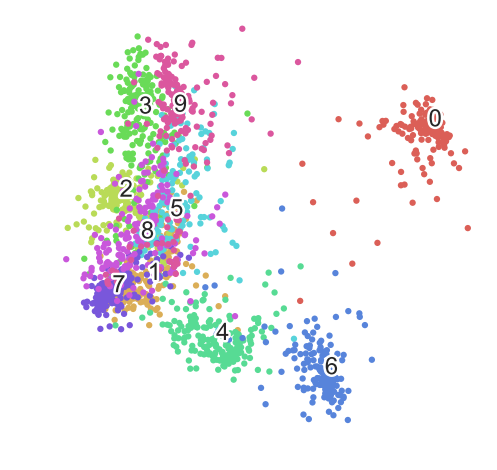

In [14]:
scatter(digits_proj_se, y)
plt.savefig('img/digits_se-generated.png', dpi=120)

In [17]:
from sklearn.decomposition import PCA

# Reduce dimensionality with PCA
digits_proj_pca = PCA(n_components=2, random_state=RS).fit_transform(X)

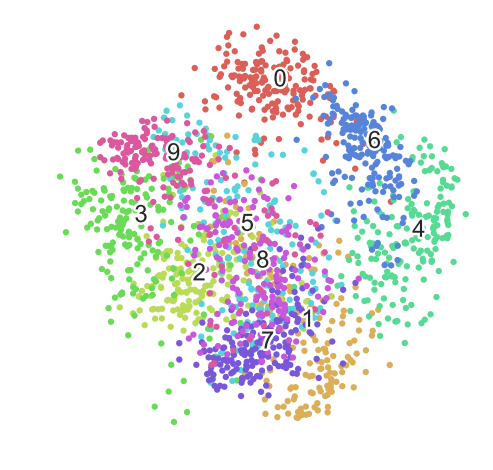

In [18]:
scatter(digits_proj_pca, y)
plt.savefig('img/digits_pca-generated.png', dpi=120)

## Conclusions

We evaluated several different techniques of dimensionality reduction on high-dimensional image data. From the results, it is clear that t-SNE is able to best capture and represent the locally-structured data in lower-dimensional space. Spectral embedding and PCA are also able to capture some of this local structure, though not as clearly as t-SNE. Locally linear embeddings are the worst-performing in terms of retaining local structure from higher dimension on the digit image data. 
